# Métodos Numéricos 2 - Tarefa 1.2



In [1]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

In [20]:
def mostrar_imagem(imagem1, titulo1, imagem2, titulo2):
  fig, ax = plt.subplots(ncols=2,figsize=(15,5))
  ax[0].imshow(imagem1, cmap = 'gray')
  ax[0].set_title(titulo1)
  ax[0].axis('off')
  ax[1].imshow(imagem2, cmap = 'gray')
  ax[1].set_title(titulo2)
  ax[1].axis('off')
  plt.show()

In [3]:
image = Image.open("/content/boneco.jpg")
image_array = np.array(image.convert('L'))

## Convolução


In [4]:
def convolucao(imagem, kernel):
  kernel = np.flipud(np.fliplr(kernel))  # rotacionando o kernel em 180 graus

  altura_imagem, largura_imagem = imagem.shape
  altura_kernel, largura_kernel = kernel.shape

  percorrer_linha = altura_imagem - altura_kernel + 1
  percorrer_coluna = largura_imagem - largura_kernel + 1

  linha_central = altura_kernel // 2
  coluna_central = largura_kernel // 2

  saida = np.copy(imagem)
  for i in range(percorrer_linha):
      for j in range(percorrer_coluna):
          janela = imagem[i : i + altura_kernel, j : j + largura_kernel]
          saida[i + linha_central, j + coluna_central] = np.sum(janela * kernel)

  return saida

## Filtro Gaussiano

In [5]:
def kernel_gaussiano(k, sigma=1):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x - (k-1)/2)**2 + (y - (k-1)/2)**2) / (2*sigma**2)), (k, k))
    return kernel / np.sum(kernel)

In [6]:
def suavizacao_gaussiana(imagem):
  kernel = kernel_gaussiano(3)
  conv = convolucao(imagem, kernel)
  return conv

In [7]:
img_suavizada = suavizacao_gaussiana(image_array)

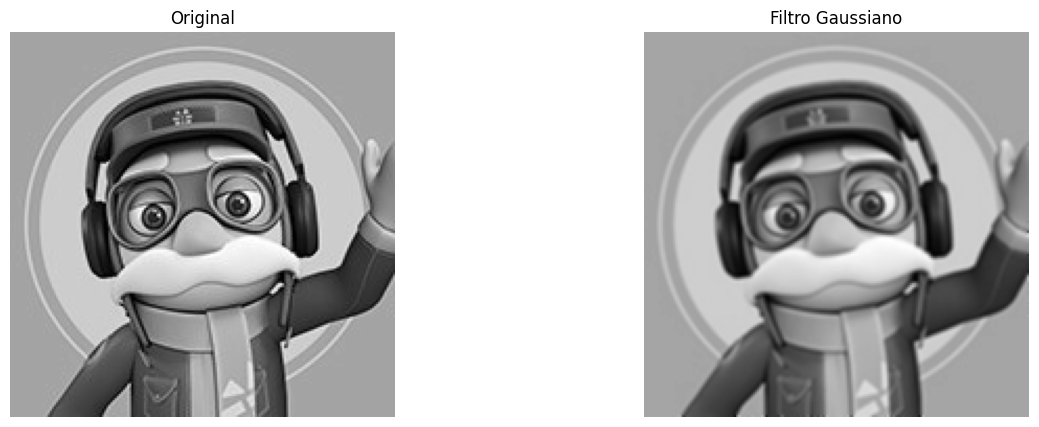

In [21]:
mostrar_imagem(image_array, "Original", img_suavizada, "Filtro Gaussiano")

## Algoritmo 1: Gradiente

Sobel X

In [9]:
def sobel_x(imagem):
  kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  filtro_x = convolucao(imagem, kernel)
  #filtro_x = filtro_x / 255
  return filtro_x

Sobel Y

In [10]:
def sobel_y(imagem):
  kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
  filtro_y = convolucao(imagem, kernel)
  #filtro_y = filtro_y / 255
  return filtro_y

Gradiente

In [11]:
def gradiente(imagem):
  imagem = imagem / 255.0
  gx = sobel_x(imagem)
  gy = sobel_y(imagem)
  gradiente = np.sqrt((gx**2) + (gy**2))
  gradiente = ((gradiente - np.min(gradiente)) / (np.max(gradiente) - np.min(gradiente)) * 255).astype(np.uint8)

  return gradiente

In [12]:
gradiente = gradiente(img_suavizada)

### Adicionar Threshold (média de pixels)

In [13]:
lm_gradiente = gradiente.copy()
lm_gradiente[gradiente > gradiente.mean()] = 255
lm_gradiente[gradiente <= gradiente.mean()] = 0

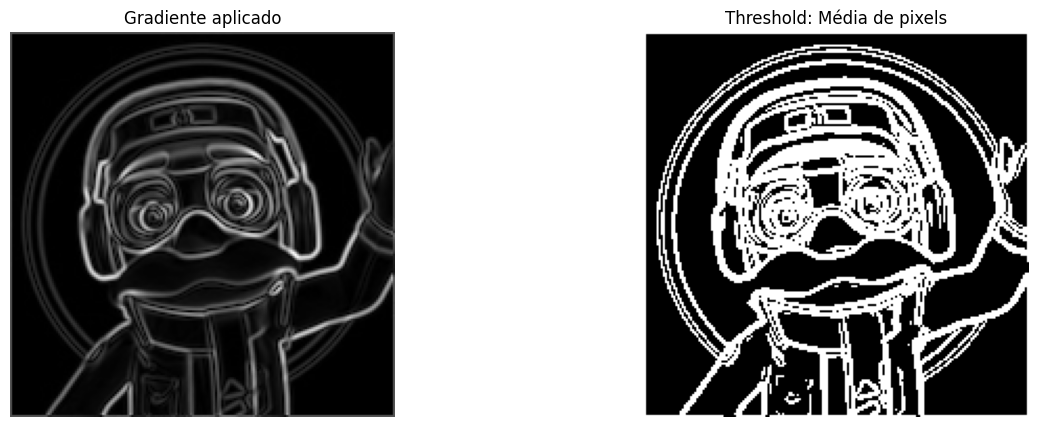

In [14]:
mostrar_imagem(gradiente, "Gradiente aplicado", lm_gradiente, "Threshold: Média de pixels")

## Algoritmo 2: Laplace


In [15]:
def imagem_laplaciana(imagem):
  imagem = imagem / 255.0
  kernel = np.array([[-1, -1, -1], [-1, 8.2, -1], [-1, -1, -1]])
  laplaciana = convolucao(imagem, kernel*(1 / 9))
  laplaciana = ((laplaciana - np.min(laplaciana)) / (np.max(laplaciana) - np.min(laplaciana)) * 255).astype(np.uint8)
  return laplaciana

In [16]:
laplaciana = imagem_laplaciana(img_suavizada)

### Adicionar Threshould (média de pixels)

In [17]:
lm_laplace = laplaciana.copy()
lm_laplace[laplaciana > laplaciana.mean()] = 255
lm_laplace[laplaciana <= laplaciana.mean()] = 0

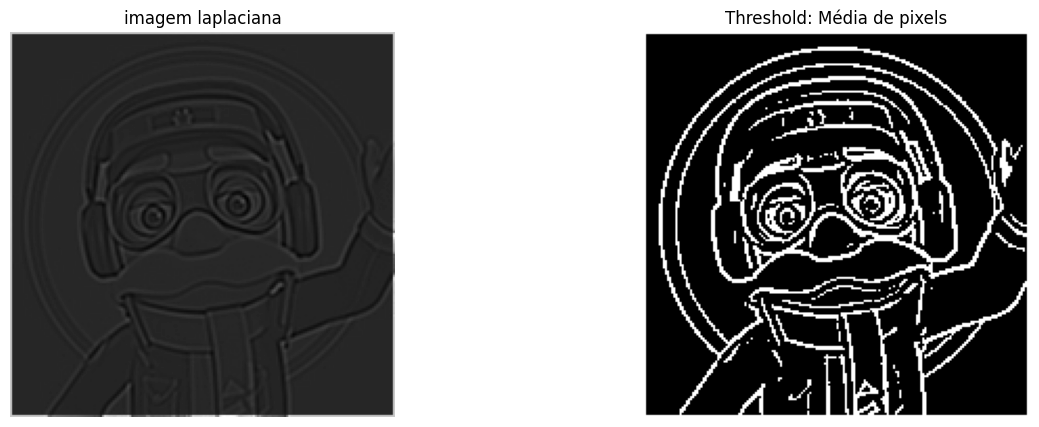

In [18]:
mostrar_imagem(laplaciana, "imagem laplaciana", lm_laplace, "Threshold: Média de pixels")

## Comparação: Algoritmo 1 X Algoritmo 2

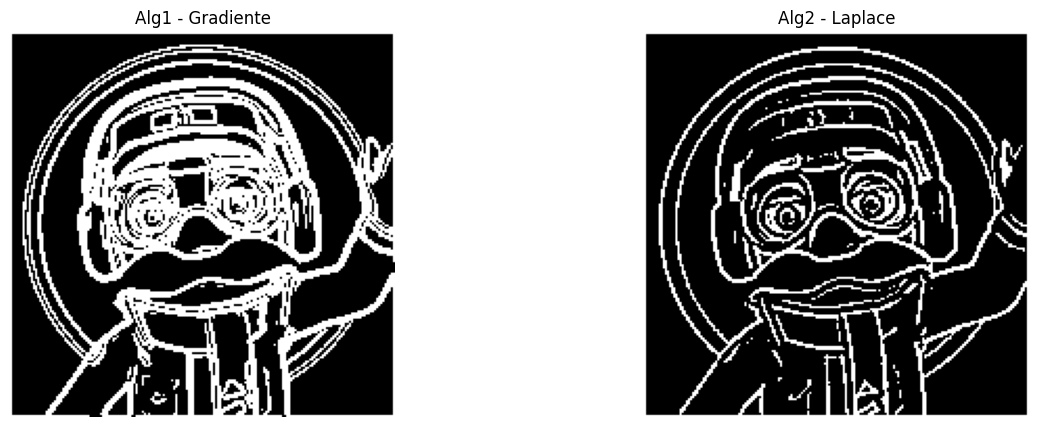

In [19]:
mostrar_imagem(lm_gradiente, "Alg1 - Gradiente", lm_laplace, "Alg2 - Laplace")